In [24]:
import networkx as nx
import matplotlib.pyplot as plt
import random

---

In [4]:
def read_graph(file_path):
    G = nx.Graph() 

    with open(file_path, 'r') as file:
        for line in file:
            node1, node2 = map(int, line.split()) 
            G.add_edge(node1, node2)

    return G

In [9]:
def display_graph(G):
    plt.figure(figsize=(10, 10)) 
    pos = nx.spring_layout(G, k=0.5, seed=42)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=500, font_size=10) 
    plt.show()

---

In [12]:
def assign_colors_to_nodes(graph, circle_file):
    node_colors = {}  
    circles = []  
    
    with open(circle_file, 'r') as file:
        for line in file:
            parts = line.strip().split() 
            nodes_in_circle = parts[1:] 
            circles.append(nodes_in_circle)

    num_circles = len(circles)
    cmap = plt.get_cmap('hsv')
    colors = [cmap(i / num_circles) for i in range(num_circles)] 
    

    for color_index, nodes_in_circle in enumerate(circles):
        for node in nodes_in_circle:
            node_colors[node] = colors[color_index] 

    for node in graph.nodes:
        graph.nodes[node]['color'] = node_colors.get(str(node), (0.5, 0.5, 0.5)) 
    
    return graph

In [21]:
def display_colored_graph(graph):
    node_colors = [graph.nodes[node].get('color', (0.5, 0.5, 0.5)) for node in graph.nodes] 
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(graph, k=0.5, seed=42)  
    nx.draw(graph, pos, with_labels=True, node_color=node_colors, edge_color='gray', node_size=500, font_size=10)
    plt.show()

---

In [25]:
def color_random_nodes_red(graph):
    all_nodes = list(graph.nodes())

    num_red_nodes = random.randint(3, 10)

    red_nodes = random.sample(all_nodes, num_red_nodes)

    for node in red_nodes:
        graph.nodes[node]['color'] = 'red'

    for node in graph.nodes:
        if 'color' not in graph.nodes[node]:
            graph.nodes[node]['color'] = 'gray'

    return graph

---

## Input Graph

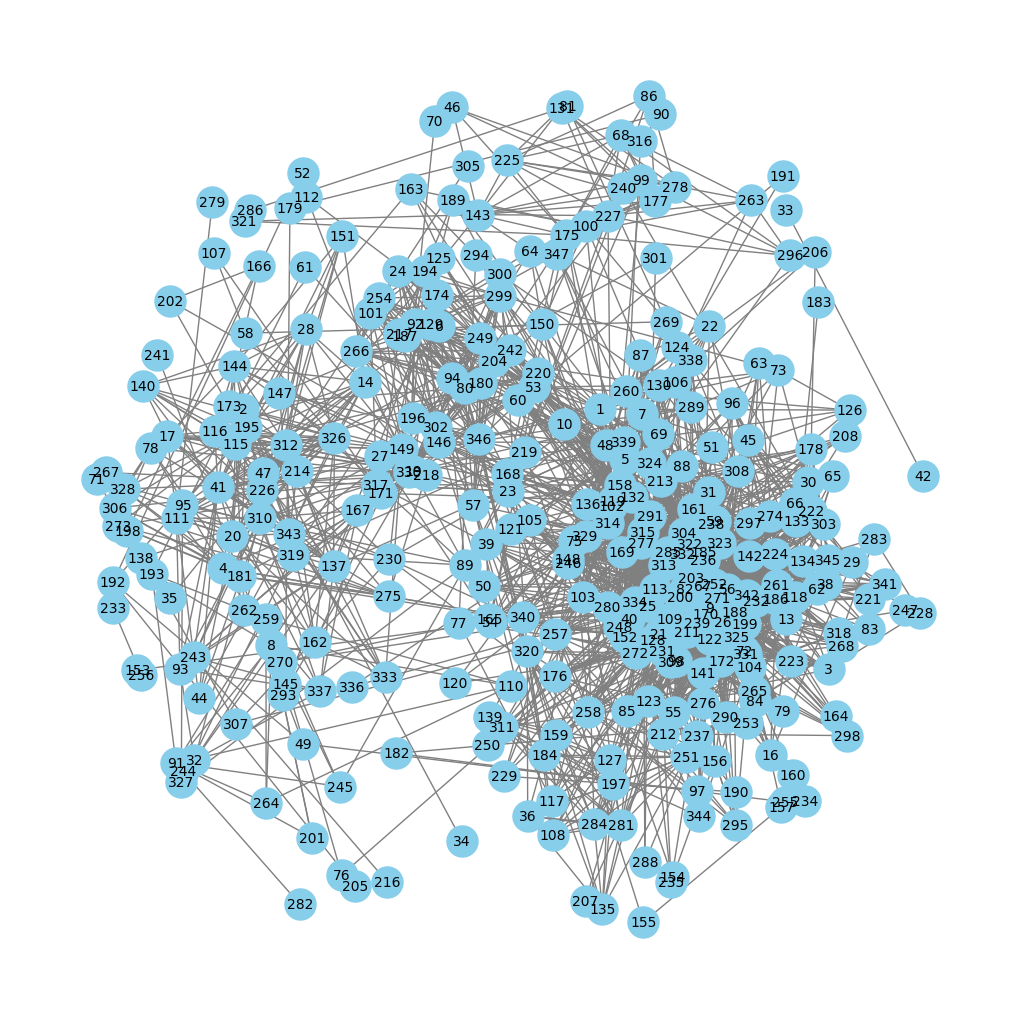

In [23]:
graph = read_graph("dataset/0.edges")
display_graph(graph)

## Identfying the Circles

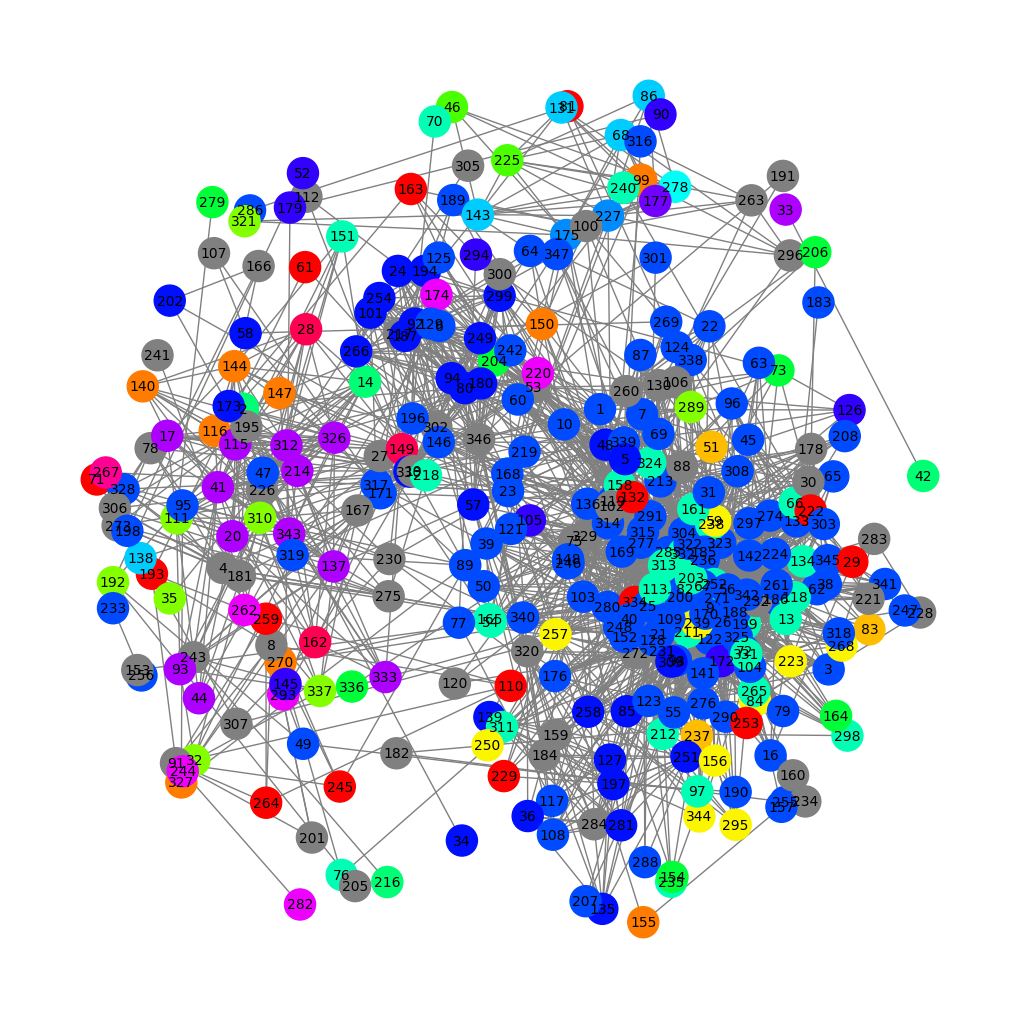

In [14]:
colored_graph = assign_colors_to_nodes(graph, 'dataset/0.circles')  # Replace with your actual circles file path
display_colored_graph(colored_graph)

## Output Graph

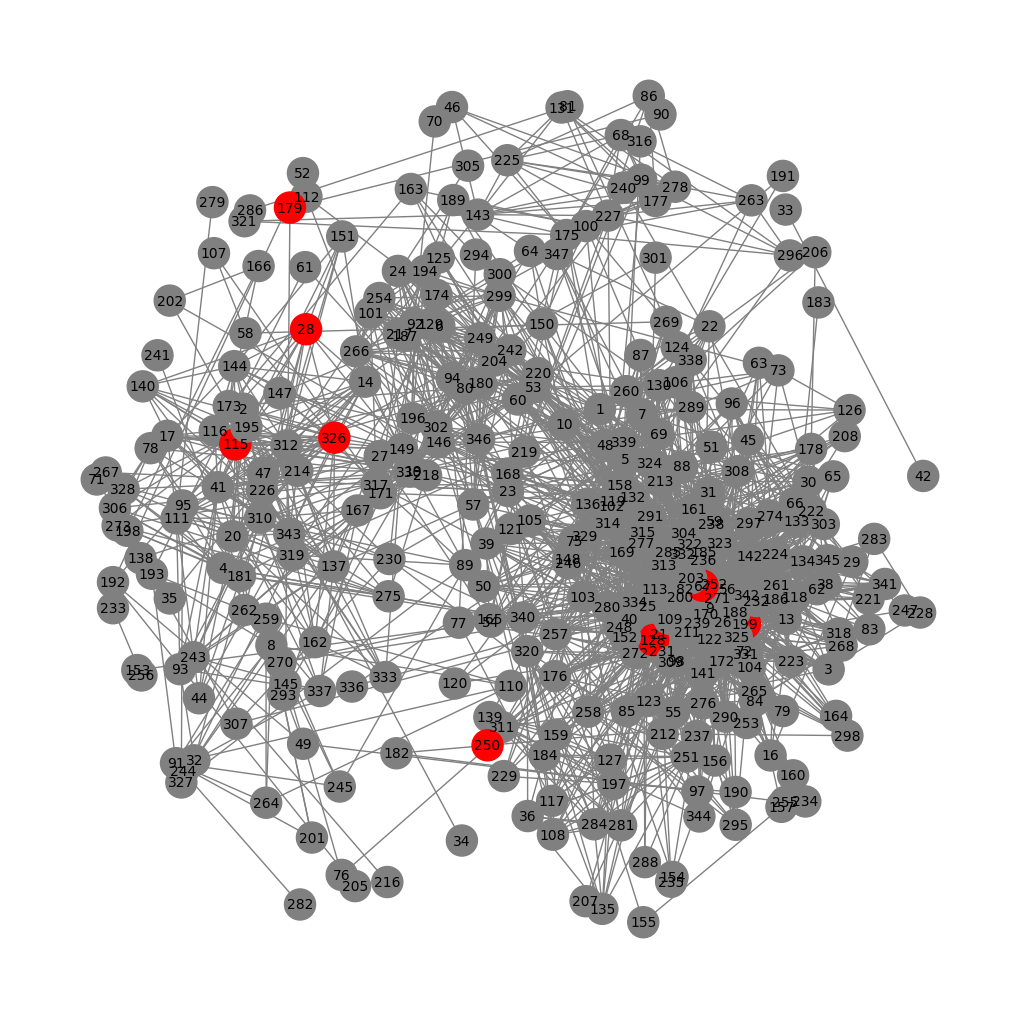

In [26]:
k
display_colored_graph(colored_graph)